<ul id="breadcrumb">
<li><a href="#第7章-支持向量机">&nbsp;</a></li>
<li><a href="#概念知识">概念知识</a></li>
<li><a href="#线性可分SVM">线性可分SVM</a></li>
<li><a href="#课本习题1.2">课本习题1.2</a></li>
<li><a href="#线性SVM">线性SVM</a></li>
<li><a href="#序列最小最优化SMO">序列最小最优化SMO</a></li>
<li><a href="#scikit-learn实例">scikit-learn实例</a></li>
</ul>

# 第7章 支持向量机

1．支持向量机最简单的情况是线性可分支持向量机，或硬间隔支持向量机。构建它的条件是训练数据线性可分。其学习策略是最大间隔法。可以表示为凸二次规划问题，其原始最优化问题为

$$\min _{w, b} \frac{1}{2}\|w\|^{2}$$

$$s.t. \quad y_{i}\left(w \cdot x_{i}+b\right)-1 \geqslant 0, \quad i=1,2, \cdots, N$$

求得最优化问题的解为$w^*$，$b^*$，得到线性可分支持向量机，分离超平面是

$$w^{*} \cdot x+b^{*}=0$$

分类决策函数是

$$f(x)=\operatorname{sign}\left(w^{*} \cdot x+b^{*}\right)$$

最大间隔法中，函数间隔与几何间隔是重要的概念。



2．现实中训练数据是线性可分的情形较少，训练数据往往是近似线性可分的，这时使用线性支持向量机，或软间隔支持向量机。线性支持向量机是最基本的支持向量机。

对于噪声或例外，通过引入松弛变量$\xi_{\mathrm{i}}$，使其“可分”，得到线性支持向量机学习的凸二次规划问题，其原始最优化问题是

$$\min _{w, b, \xi} \frac{1}{2}\|w\|^{2}+C \sum_{i=1}^{N} \xi_{i}$$

$$s.t. \quad y_{i}\left(w \cdot x_{i}+b\right) \geqslant 1-\xi_{i}, \quad i=1,2, \cdots, N$$

$$\xi_{i} \geqslant 0, \quad i=1,2, \cdots, N$$

求解原始最优化问题的解$w^*$和$b^*$，得到线性支持向量机，其分离超平面为

$$w^{*} \cdot x+b^{*}=0$$

分类决策函数为

$$f(x)=\operatorname{sign}\left(w^{*} \cdot x+b^{*}\right)$$

线性可分支持向量机的解$w^*$唯一但$b^*$不唯一。对偶问题是

$$\min _{\alpha} \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j}\left(x_{i} \cdot x_{j}\right)-\sum_{i=1}^{N} \alpha_{i}$$

$$s.t. \quad \sum_{i=1}^{N} \alpha_{i} y_{i}=0$$

$$0 \leqslant \alpha_{i} \leqslant C, \quad i=1,2, \cdots, N$$

线性支持向量机的对偶学习算法，首先求解对偶问题得到最优解$\alpha^*$，然后求原始问题最优解$w^*$和$b^*$，得出分离超平面和分类决策函数。

对偶问题的解$\alpha^*$中满$\alpha_{i}^{*}>0$的实例点$x_i$称为支持向量。支持向量可在间隔边界上，也可在间隔边界与分离超平面之间，或者在分离超平面误分一侧。最优分离超平面由支持向量完全决定。

线性支持向量机学习等价于最小化二阶范数正则化的合页函数

$$\sum_{i=1}^{N}\left[1-y_{i}\left(w \cdot x_{i}+b\right)\right]_{+}+\lambda\|w\|^{2}$$

3．非线性支持向量机

对于输入空间中的非线性分类问题，可以通过非线性变换将它转化为某个高维特征空间中的线性分类问题，在高维特征空间中学习线性支持向量机。由于在线性支持向量机学习的对偶问题里，目标函数和分类决策函数都只涉及实例与实例之间的内积，所以不需要显式地指定非线性变换，而是用核函数来替换当中的内积。核函数表示，通过一个非线性转换后的两个实例间的内积。具体地，$K(x,z)$是一个核函数，或正定核，意味着存在一个从输入空间x到特征空间的映射$\mathcal{X} \rightarrow \mathcal{H}$，对任意$\mathcal{X}$，有

$$K(x, z)=\phi(x) \cdot \phi(z)$$

对称函数$K(x,z)$为正定核的充要条件如下：对任意$$\mathrm{x}_{\mathrm{i}} \in \mathcal{X}, \quad \mathrm{i}=1,2, \ldots, \mathrm{m}$$，任意正整数$m$，对称函数$K(x,z)$对应的Gram矩阵是半正定的。

所以，在线性支持向量机学习的对偶问题中，用核函数$K(x,z)$替代内积，求解得到的就是非线性支持向量机

$$f(x)=\operatorname{sign}\left(\sum_{i=1}^{N} \alpha_{i}^{*} y_{i} K\left(x, x_{i}\right)+b^{*}\right)$$

4．SMO算法

SMO算法是支持向量机学习的一种快速算法，其特点是不断地将原二次规划问题分解为只有两个变量的二次规划子问题，并对子问题进行解析求解，直到所有变量满足KKT条件为止。这样通过启发式的方法得到原二次规划问题的最优解。因为子问题有解析解，所以每次计算子问题都很快，虽然计算子问题次数很多，但在总体上还是高效的。


## 概念知识
----

### 超平面、分离超平面、决策边界/间隔边界、间隔、支持向量、支持向量机等的可视化

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

class1 = np.array([[1, 1], [1, 3], [2, 1], [1, 2], [2, 2]])
class2 = np.array([[4, 4], [5, 5], [5, 4], [5, 3], [4, 5], [6, 4]])

Text(0.5, 1.5, 'support vector')

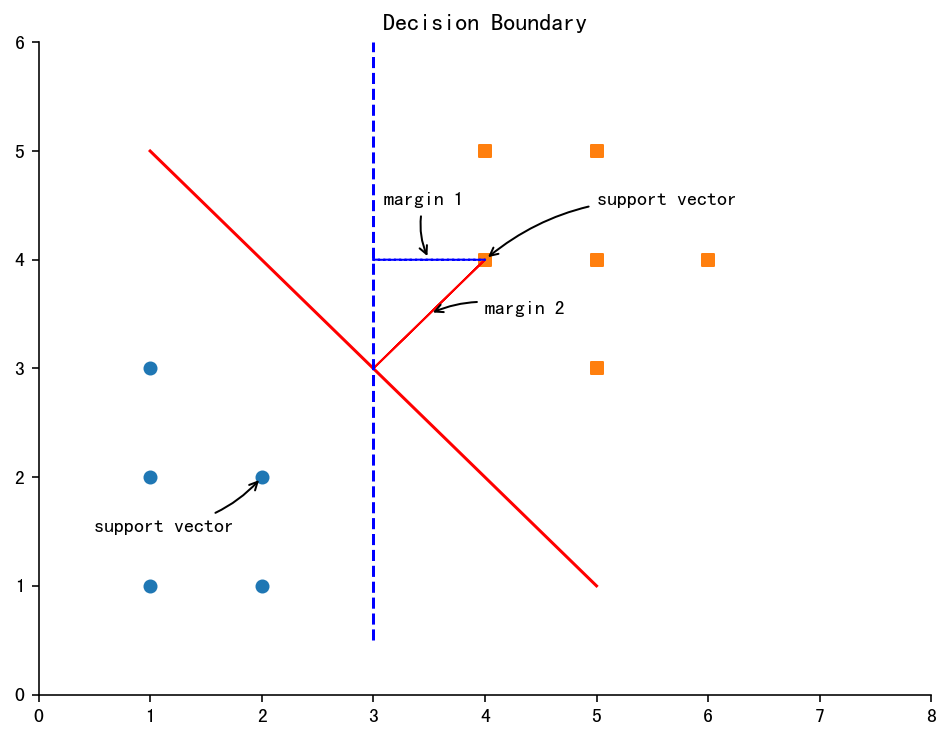

In [2]:
plt.figure(figsize=(8, 6), dpi=144)

plt.title('Decision Boundary')

plt.xlim(0, 8)
plt.ylim(0, 6)
ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
ax.spines['right'].set_color('none')            # 隐藏坐标轴
ax.spines['top'].set_color('none')

plt.scatter(class1[:, 0], class1[:, 1], marker='o')
plt.scatter(class2[:, 0], class2[:, 1], marker='s')
plt.plot([1, 5], [5, 1], '-r')
plt.arrow(4, 4, -1, -1, shape='full', color='r')
plt.plot([3, 3], [0.5, 6], '--b')
plt.arrow(4, 4, -1, 0, shape='full', color='b', linestyle='--')
plt.annotate(r'margin 1',
             xy=(3.5, 4), xycoords='data',
             xytext=(3.1, 4.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'margin 2',
             xy=(3.5, 3.5), xycoords='data',
             xytext=(4, 3.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'support vector',
             xy=(4, 4), xycoords='data',
             xytext=(5, 4.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'support vector',
             xy=(2, 2), xycoords='data',
             xytext=(0.5, 1.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

Text(5, 4.5, 'A')

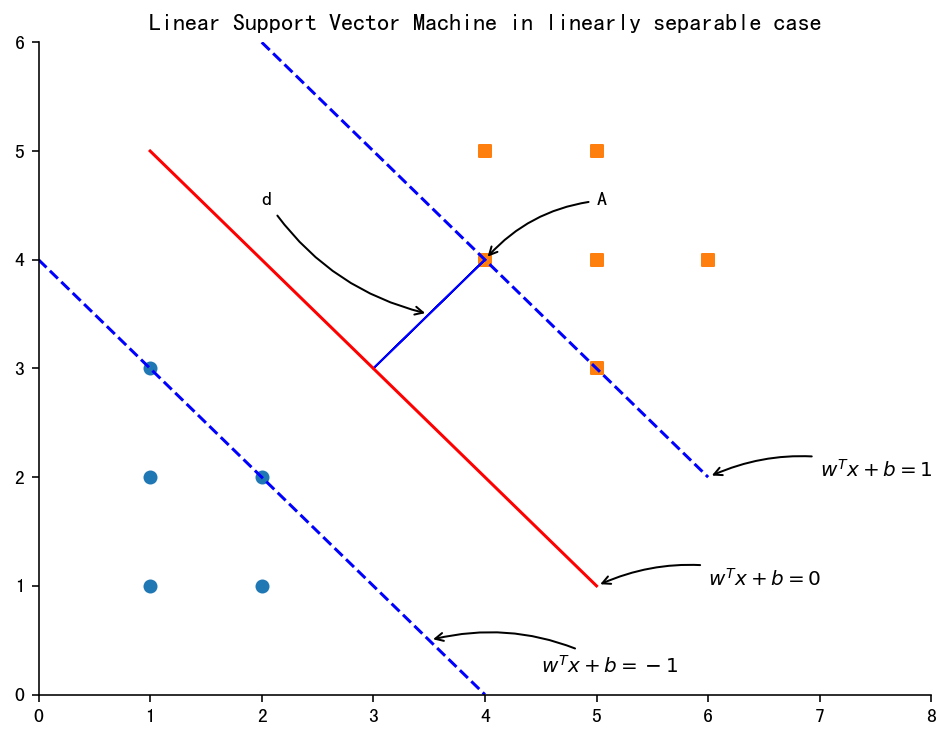

In [3]:
plt.figure(figsize=(8, 6), dpi=144)

plt.title('Linear Support Vector Machine in linearly separable case')

plt.xlim(0, 8)
plt.ylim(0, 6)
ax = plt.gca()                                  # gca 代表当前坐标轴，即 'get current axis'
ax.spines['right'].set_color('none')            # 隐藏坐标轴
ax.spines['top'].set_color('none')

plt.scatter(class1[:, 0], class1[:, 1], marker='o')
plt.scatter(class2[:, 0], class2[:, 1], marker='s')
plt.plot([1, 5], [5, 1], '-r')
plt.plot([0, 4], [4, 0], '--b', [2, 6], [6, 2], '--b')
plt.arrow(4, 4, -1, -1, shape='full', color='b')
plt.annotate(r'$w^T x + b = 0$',
             xy=(5, 1), xycoords='data',
             xytext=(6, 1), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'$w^T x + b = 1$',
             xy=(6, 2), xycoords='data',
             xytext=(7, 2), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'$w^T x + b = -1$',
             xy=(3.5, 0.5), xycoords='data',
             xytext=(4.5, 0.2), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'd',
             xy=(3.5, 3.5), xycoords='data',
             xytext=(2, 4.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(r'A',
             xy=(4, 4), xycoords='data',
             xytext=(5, 4.5), fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

分离超平面：$w\cdot x+b=0$ 或者 $w^Tx+b=0$



给定分离超平面$(w,b)$，样本可表示为：

$w^Tx+b\ \geq+1$

$w^Tx+b\ \leq-1$

### 间隔(margin)

一般说来，一个点距离分离超平面的远近可以表示分类预测的确信程度。在超平面$w\cdot x+b=0$确定的确定的情况下，可以用量$y_i(w\cdot x+b)$来表示对$(x,y)$分类点正确性和确信度，这就是：

**函数间隔**：$\hat{\gamma_i} = y_i(w\cdot x+b)\ or\ y_i(w^Tx+b)$ 

选择分离超平面时，$\hat{\gamma_i}$还不够。因为只要成比例改变$w$和$b$，超平面并没有变化，但$\hat{\gamma_i}$确是原来的几倍。所以要对法向量$w$加某些约束，如规范化。

**几何间隔**：$\gamma_i = \frac{y_i(w^Tx_i+b)}{||w||}$，

当数据$(x_i,y_i)$被正确分类时，几何间隔就是点$(x_i)$到超平面的距离.点到超平面的远近可以表示分类预测到确信程度——越远表示越确信，越近就表示不那么确信。

**点$x$到超平面$(w,b)$的距离**

点$x$到超平面$(w,b)$的垂直距离：$\gamma=\frac{|w \cdot x+b|}{||w||}$ 或者 $\gamma=\frac{|w^Tx+b|}{||w||_2}$

其中$||w||$和$||w||_2$都为2-范数：$||w||_2=\sqrt[2]{\sum^m_{l=1}{w^{(l)}}^2}$

## 线性可分SVM

SVM的基本思想是求解能够正确划分数据集并且几何间隔最大的分类超平面。

为了求几何间隔最大，SVM基本问题可以转化为求解:

$$\max_{w,b}\ \gamma$$

$$(subject\ to)\ y_i\left(\frac{{w^T}x_i+{b}}{||w||}\right)\geq {\gamma},\ i=1,2,..,N$$

其中$\gamma=\min _{i=1, N} \gamma_{i}$为几何间隔。分类点几何间隔最大，同时被正确分类。

但这个方程并非凸函数求解，所以要先①将方程转化为凸函数，②用拉格朗日乘子法和KKT条件求解对偶问题。

①转化为凸函数：

先令${\gamma}=1$，方便计算（参照衡量，不影响评价结果）

$$\max_{w,b}\ \frac{1}{||w||}$$

$$s.t.\ y_i({w^T}x_i+{b})\geq {1},\ i=1,2,..,N$$

再将$\max_{w,b}\ \frac{1}{||w||}$转化成$\min_{w,b}\ \frac{1}{2}||w||^2$求解凸函数，1/2是为了求导之后方便计算。

$$\min_{w,b}\ \frac{1}{2}||w||^2$$

$$s.t.\ y_i(w^Tx_i+b)\geq 1,\ i=1,2,..,N$$

②用拉格朗日乘子法和KKT条件求解最优值：

$$\min_{w,b}\ \frac{1}{2}||w||^2$$

$$s.t.\ -y_i(w^Tx_i+b)+1\leq 0,\ i=1,2,..,m$$

整合成：

$$L(w, b, \alpha) = \frac{1}{2}||w||^2+\sum^m_{i=1}\alpha_i(-y_i(w^Tx_i+b)+1)$$

推导：$\min\ f(x)=\min_{w,b} \max_\alpha\ L(w, b, \alpha)\geq \max_\alpha \min_{w,b}\ L(w, b, \alpha)$

根据KKT条件：

$$\frac{\partial }{\partial w}L(w, b, \alpha)=w-\sum\alpha_iy_ix_i=0,\ w=\sum\alpha_iy_ix_i$$

$$\frac{\partial }{\partial b}L(w, b, \alpha)=\sum\alpha_iy_i=0$$

代入$ L(w, b, \alpha)$

$\min_{w,b}\  L(w, b, \alpha)=\frac{1}{2}||w||^2+\sum^m_{i=1}\alpha_i(-y_i(w^Tx_i+b)+1)$

$\qquad\qquad\qquad=\frac{1}{2}w^Tw-\sum^m_{i=1}\alpha_iy_iw^Tx_i-b\sum^m_{i=1}\alpha_iy_i+\sum^m_{i=1}\alpha_i$

$\qquad\qquad\qquad=\frac{1}{2}w^T\sum\alpha_iy_ix_i-\sum^m_{i=1}\alpha_iy_iw^Tx_i+\sum^m_{i=1}\alpha_i$

$\qquad\qquad\qquad=\sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i=1}\alpha_iy_iw^Tx_i$

$\qquad\qquad\qquad=\sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_ix_j)$

再把max问题转成min问题：

$\max_\alpha\ \sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_i\cdot x_j)=\min_\alpha \frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_i\cdot x_j)-\sum^m_{i=1}\alpha_i$

$s.t.\ \sum^m_{i=1}\alpha_iy_i=0,$

$ \alpha_i \geq 0,i=1,2,...,m$

以上为SVM对偶问题的对偶形式


### 课本例子7.2

已知正例点$x_1,x_2$，负例点$x_3$，试求最大间隔分离超平面。
$$\frac{1}{2}(18\alpha^2_1 + 42\alpha_1\alpha_2 - 12\alpha_1\alpha_3 + 25\alpha^2_2 - 14\alpha_2\alpha_3 + 2\alpha^2_3) - (\alpha_1+\alpha_2+\alpha_3)$$
$$\alpha_1 + \alpha_2 - \alpha_3 = 0$$

In [2]:
#x1,x2,x3
X = np.array([[3, 3], [4, 3], [1, 1]])
y = np.array([1, 1, -1])

In [3]:
from scipy import optimize as opti
import numpy as np

fun = lambda w: ((w[0]) ** 2 + (w[1]) ** 2)/2
cons = ({'type': 'ineq', 'fun': lambda w: X[0][0] * w[0] + X[0][1] * w[1] + w[2] - 1},
    {'type': 'ineq', 'fun': lambda w: X[1][0] * w[0] + X[1][1] * w[1] + w[2] - 1},
    {'type': 'ineq', 'fun': lambda w: -X[2][0]* w[0] - X[2][1]* w[1] - w[2] - 1})
res = opti.minimize(fun, np.ones(3), method='SLSQP', constraints=cons)
print(res)

     fun: 0.2500000000000011
     jac: array([0.50000001, 0.50000001, 0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 10
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([ 0.5,  0.5, -2. ])


### 课本习题1.2

已知正例点$x_1,x_2,x_3$，负例点$x_4,x_5$，试求最大间隔分离超平面。
$$\frac{1}{2}(10\alpha^2_1 + 16\alpha_1\alpha_2 + 18\alpha_1\alpha_3 - 8\alpha_1\alpha_4 - 14\alpha_1\alpha_5 + 26\alpha^2_2 + 30\alpha_2\alpha_3 - 14\alpha_2\alpha_4 - 24\alpha_2\alpha_5 + 36\alpha^2_3 - 18\alpha_3\alpha_4 - 30\alpha_3\alpha_5 + 10\alpha^2_4 + 16\alpha_4\alpha_5 + 26\alpha^2_5) - (\alpha_1+\alpha_2+\alpha_3+\alpha_4+\alpha_5)$$
$$\alpha_1 + \alpha_2 + \alpha_3 - \alpha_4 - \alpha_5 = 0$$

Alpha: [0.5 0.  2.  0.  2.5]

Hyperplane: hyperplane: $(-1.0, 2.0)^T\cdot x -2.0 = 0$

In [2]:
import numpy as np
#x1,x2,x3,x4,x5
X = np.array([[1, 2], [2, 3], [3, 3], [2, 1], [3, 2]])
y = np.array([1, 1, 1, -1, -1])

In [3]:
import numpy as np
def problem(X, y, debug=False):
    f = "+".join(["(w[{}]) ** 2".format(i) for i in range(X.shape[1])])
    f = "lambda w: ({})/2".format(f)
    if debug:
        print("Objective: {}".format(f))
    fun = eval(f)
    c=[]
    for i,_ in enumerate(y):
        f = ["{}*w[{}]".format(X[i][l],l) for l in range(X.shape[1])]
        f.append("w[{}]".format(X.shape[1]))
        if y[i]==1:
            f = "lambda w: " + "+".join(f) + "-1"
        else:
            f.append("1")
            f = "lambda w: -" + "-".join(f)
        if debug:
            print("Cons: {}".format(f))
        c.append({'type': 'ineq', 'fun': eval(f)})
    cons = tuple(c)          
    return fun, cons

In [4]:
from scipy import optimize as opti
fun,cons = problem(X, y, debug=False)
res = opti.minimize(fun, np.ones(X.shape[0]), method='SLSQP', constraints=cons)
print(res)

     fun: 2.5000000000000098
     jac: array([-1.,  2.,  0.,  0.,  0.])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([-1.,  2., -2.,  1.,  1.])


### 对偶问题

线性可分支持向量机的最优解存在且唯一。位于间隔边界上的实例点为支持向量。最优分离超平面由支持向量完全决定。
二次规划问题的对偶问题是
$$\min_\alpha \frac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j}\left(x_{i} \cdot x_{j}\right)-\sum_{i=1}^{N} \alpha_{i}$$

$$s.t. \quad \sum_{i=1}^{N} \alpha_{i} y_{i}=0$$

$$\alpha_{i} \geqslant 0, \quad i=1,2, \cdots, N$$

通常，通过求解对偶问题学习线性可分支持向量机，即首先求解对偶问题的最优值$\alpha^*$，然后求最优值$w^*$和$b^*$，得出分离超平面和分类决策函数。

In [7]:
import numpy as np
def dualProblem(X, y, latex=True, debug=False):
    Gram = np.dot(X, X.T)
    if latex:
        print(Gram.round(2))
    if latex:
        obj = "\\frac{1}{2}("
        idx = 1
    else:
        obj = ".5*("
        idx = 0
    for i in range(X.shape[0]):
        for j in range(i, X.shape[0]):
            if latex:
                obj_ii = "{}\\alpha^2_{}"
                obj_ij = "{}\\alpha_{}\\alpha_{}"
            else:
                obj_ii = "{}*(a[{}])**2"
                obj_ij = "{}*a[{}]*a[{}]"
            if i==j:
                obj_ii = obj_ii.format(Gram[i,i], i+idx)
                if i==0:
                    obj += obj_ii
                else:
                    obj += " + "+obj_ii
            elif y[i]*y[j]>0:
                obj_ij = obj_ij.format(2*Gram[i,j], i+idx, j+idx)
                obj += " + "+obj_ij
            else:
                obj_ij = obj_ij.format(2*Gram[i,j], i+idx, j+idx)
                obj += " - "+obj_ij
    obj += ") - ("
    if latex:
        alpha_i = "\\alpha_{}"
    else:
        alpha_i = "a[{}]"
    for i in range(y.shape[0]):
        obj += alpha_i.format(i+idx)
        if (i+1)<y.shape[0]:
            obj += "+"
    obj += ")"
    if latex:
        print(obj)
    else:
        obj = "lambda a: "+ obj
        if debug:
            print("Objective: {}".format(obj))
        fun = eval(obj)
        
    cons=[]
    cstr = ""
    for i in range(y.shape[0]):
        if y[i]==-1:
            cstr += " - "+alpha_i.format(i+idx)
        else:
            if i!=0:
                cstr += " + "
            cstr += alpha_i.format(i+idx)
 
    if latex:
        cstr += " = 0"
        print(cstr)
        return obj, cstr
    else:
        cstr = "lambda a: "+cstr
        if debug:
            print("Cons: {}".format(cstr))
        cons.append({'type': 'eq', 'fun': eval(cstr)})
        for i in range(y.shape[0]):
            cstr = "lambda a: a[{}]".format(i)
            cons.append({'type': 'ineq', 'fun': eval(cstr)})
            if debug:
                print("Cons: {}".format(cstr))
        return fun, tuple(cons)
    
def hyperplane(alpha, X, y):
    Gram = np.dot(X, X.T)
    yx = y.reshape(-1, 1) * X
    w = np.dot(yx.T, alpha)
    j = [j for j,v in enumerate(alpha) if alpha[j]>0][0]
    b = y[j] - sum([alpha[i]*y[i]*Gram[i,j] for i in range(y.shape[0])])
    if b > 0:
        msg = "{}^T\cdot x + {:.1f} = 0"
    else:
        msg = "{}^T\cdot x {:.1f} = 0"   
    return msg.format(tuple(w.round(2)), b)

In [8]:
from scipy import optimize as opti
latex=True
obj,cons = dualProblem(X, y, latex=latex, debug=True)
if not latex:
    res = opti.minimize(obj, np.ones(X.shape[0]), method='SLSQP', constraints=cons)
    alpha = res["x"].round(2)
    print("Alpha: {}".format(alpha))
    print("Hyperplane: {}".format(hyperplane(alpha, X, y)))

[[ 5  8  9  4  7]
 [ 8 13 15  7 12]
 [ 9 15 18  9 15]
 [ 4  7  9  5  8]
 [ 7 12 15  8 13]]
\frac{1}{2}(5\alpha^2_1 + 16\alpha_1\alpha_2 + 18\alpha_1\alpha_3 - 8\alpha_1\alpha_4 - 14\alpha_1\alpha_5 + 13\alpha^2_2 + 30\alpha_2\alpha_3 - 14\alpha_2\alpha_4 - 24\alpha_2\alpha_5 + 18\alpha^2_3 - 18\alpha_3\alpha_4 - 30\alpha_3\alpha_5 + 5\alpha^2_4 + 16\alpha_4\alpha_5 + 13\alpha^2_5) - (\alpha_1+\alpha_2+\alpha_3+\alpha_4+\alpha_5)
\alpha_1 + \alpha_2 + \alpha_3 - \alpha_4 - \alpha_5 = 0


In [9]:
from scipy import optimize as opti
import numpy as np
latex=False
T = np.loadtxt("7ex1.2.txt").round(2)
X = T[:,:-1]
y = T[:,2]
obj,cons = dualProblem(X, y, latex=latex, debug=True)
if not latex:
    res = opti.minimize(obj, np.ones(X.shape[0]), method='SLSQP', constraints=cons)
    alpha = res["x"].round(2)
    print("Alpha: {}".format(alpha))
    print("Hyperplane: {}".format(hyperplane(alpha, X, y)))

Objective: lambda a: .5*(65.0*(a[0])**2 + 124.0*a[0]*a[1] - 186.0*a[0]*a[2] + 56.0*a[0]*a[3] - 248.0*a[0]*a[4] + 61.0*(a[1])**2 - 150.0*a[1]*a[2] + 48.0*a[1]*a[3] - 222.0*a[1]*a[4] + 234.0*(a[2])**2 - 120.0*a[2]*a[3] + 462.0*a[2]*a[4] + 16.0*(a[3])**2 - 128.0*a[3]*a[4] + 265.0*(a[4])**2) - (a[0]+a[1]+a[2]+a[3]+a[4])
Cons: lambda a:  - a[0] - a[1] + a[2] - a[3] + a[4]
Cons: lambda a: a[0]
Cons: lambda a: a[1]
Cons: lambda a: a[2]
Cons: lambda a: a[3]
Cons: lambda a: a[4]
Alpha: [ 0.02 -0.    0.   -0.    0.02]
Hyperplane: (0.18, -0.02)^T\cdot x -2.2 = 0


## 线性SVM


In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
    
def plot_hyperplane(clf, X, y, 
                    h=0.02, 
                    draw_sv=True, 
                    title='hyperplan'):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)

    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y==label][:, 0], 
                    X[y==label][:, 1], 
                    c=colors[label], 
                    marker=markers[label])
    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='w', marker='x') 

/Users/rchen/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


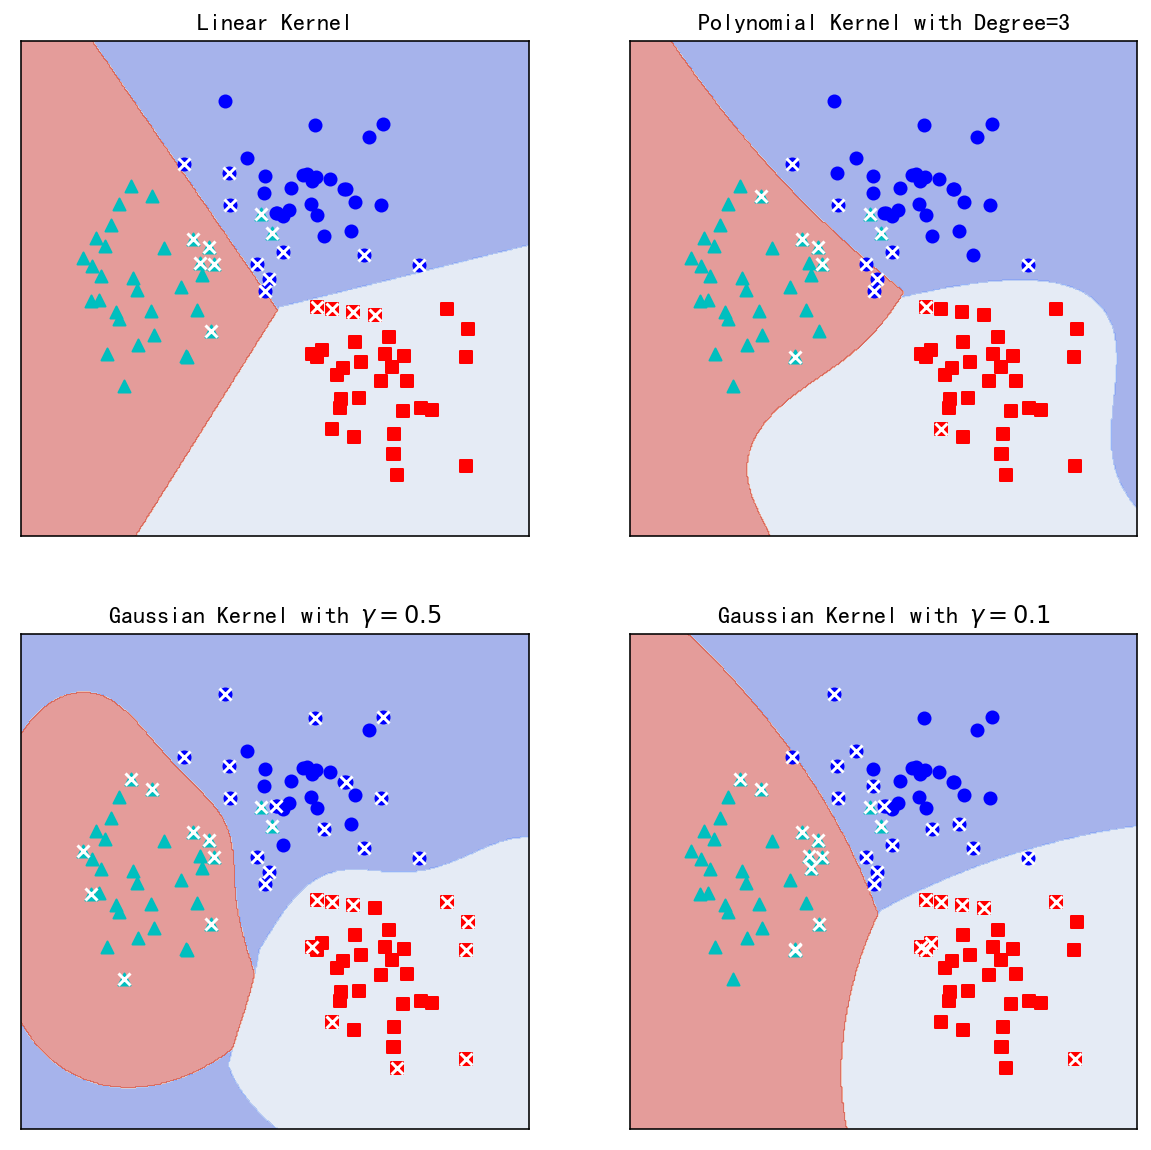

In [89]:
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=3, 
                  random_state=0, cluster_std=0.8)
clf_linear = svm.SVC(C=1.0, kernel='linear')
clf_poly = svm.SVC(C=1.0, kernel='poly', degree=3)
clf_rbf = svm.SVC(C=1.0, kernel='rbf', gamma=0.5)
clf_rbf2 = svm.SVC(C=1.0, kernel='rbf', gamma=0.1)

plt.figure(figsize=(10, 10), dpi=144)

clfs = [clf_linear, clf_poly, clf_rbf, clf_rbf2]
titles = ['Linear Kernel', 
          'Polynomial Kernel with Degree=3', 
          'Gaussian Kernel with $\gamma=0.5$', 
          'Gaussian Kernel with $\gamma=0.1$']
for clf, i in zip(clfs, range(len(clfs))):
    clf.fit(X, y)
    plt.subplot(2, 2, i+1)
    plot_hyperplane(clf, X, y, title=titles[i])

### kernel

在低维空间计算获得高维空间的计算结果，也就是说计算结果满足高维（满足高维，才能说明高维下线性可分）。

### soft margin & slack variable

引入松弛变量$\xi\geq0$，对应数据点允许偏离的functional margin 的量。

目标函数：

$$\min\ \frac{1}{2}||w||^2+C\sum\xi_i\qquad s.t.\ y_i(w^Tx_i+b)\geq1-\xi_i$$ 

对偶问题：

$$\max\ \sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_ix_j)=\min \frac{1}{2}\sum^m_{i,j=1}\alpha_i\alpha_jy_iy_j(x_ix_j)-\sum^m_{i=1}\alpha_i$$

$$s.t.\ C\geq\alpha_i \geq 0,i=1,2,...,m\quad \sum^m_{i=1}\alpha_iy_i=0,$$


### 序列最小最优化SMO

Sequential Minimal Optimization

首先定义特征到结果的输出函数：$u=w^Tx+b$.

因为$w=\sum\alpha_iy_ix_i$

有$u=\sum y_i\alpha_iK(x_i, x)-b$


----

$$\max \sum^m_{i=1}\alpha_i-\frac{1}{2}\sum^m_{i=1}\sum^m_{j=1}\alpha_i\alpha_jy_iy_j<\phi(x_i)^T,\phi(x_j)>$$

$$s.t.\ \sum^m_{i=1}\alpha_iy_i=0,$$

$$ \alpha_i \geq 0,i=1,2,...,m$$

In [75]:
class SVM:
    def __init__(self,
                 tol=10e-3,
                 C=0.6,
                 n_iters=10,
                 verbose=True):
        self.alpha = None
        self.b = 0
        self.tol = tol
        self.C = C
        self.n_iters = n_iters
        self.m = 0
        self.verbose = verbose

    def fit(self, X, y):
        self.m, self.n = X.shape
        #1. 创建一个 alpha 向量并将其初始化为0向量
        self.alpha = np.zeros(self.m)
        self.b = 0
        self.X = X
        self.Y = y
        self._do_smo(X, y)

    def _do_smo(self, X, y):
        n_iter = 0
        #2. 当迭代次数小于最大迭代次数时(外循环)
        while n_iter < self.n_iters:
            alpha_pairs_changed = 0
            #3. 对数据集中的每个数据向量(内循环)：
            for i in range(self.m):
                ei = self._do_ei(X, y, i)
                #4. 如果该数据向量可以被优化
                if ((y[i] * ei < -self.tol) and (self.alpha[i] < self.C)) or \
                   ((y[i] * ei > self.tol) and (self.alpha[i] > 0)):
                    #5. 随机选择另外一个数据向量
                    j = self._do_selectj(i, self.m)
                    ej = self._do_ei(X, y, j)
                    #6. 同时优化这两个向量
                    alphaiold = self.alpha[i].copy()
                    alphajold = self.alpha[j].copy()
                    if y[i] != y[j]:
                        L = max(0.0, self.alpha[j] - self.alpha[i])
                        H = min(self.C, self.C + self.alpha[j] - self.alpha[i])
                    else:
                        L = max(0.0, self.alpha[j] + self.alpha[i] - self.C)
                        H = min(self.C, self.alpha[j] + self.alpha[i])
                    if L == H:
                        if self.verbose:
                            print("L==H")
                        continue
                    eta = self._do_eta(X, i, j)
                    # 简化处理
                    if eta >= 0:
                        if self.verbose:
                            print("eta>=0")
                        continue
                    # alpha[j]
                    self.alpha[j] -= y[j] * (ei - ej) / eta
                    self.alpha[j] = self._do_clipalpha(self.alpha[j], H, L)

                    if abs(self.alpha[j] - alphajold) < 0.00001:
                        if self.verbose:
                            print("j not moving enough")
                        continue
                    # alpha[i]
                    self.alpha[i] += y[j] * y[i] * (alphajold - self.alpha[j])
                    #
                    b1 = self.b - ei - y[i] * (self.alpha[i] - alphaiold) * np.dot(X[i, :], X[i, :]) - \
                         y[j] * (self.alpha[j] - alphajold) * np.dot(X[i, :], X[j, :])

                    b2 = self.b - ej - y[i] * (self.alpha[i] - alphaiold) * np.dot(X[i, :], X[j, :]) - \
                         y[j] * (self.alpha[j] - alphajold) * np.dot(X[j, :], X[j, :])

                    if (0 < self.alpha[i]) and (self.C > self.alpha[j]):
                        self.b = b1
                    elif (0 < self.alpha[j]) and (self.C > self.alpha[j]):
                        self.b = b2
                    else:
                        self.b = (b1 + b2) / 2
                    alpha_pairs_changed += 1
                    if self.verbose:
                        print("iter: %d i: %d, paris changed %d" % (n_iter, i, alpha_pairs_changed))
                #7. 如果两个向量都不能被优化，退出内循环
            if alpha_pairs_changed == 0:
                n_iter += 1
            else:
                n_iter = 0
            if self.verbose:
                print("iteration number: %d" % n_iter)
            #8. 如果所有向量都没被优化，增加迭代数目，继续下一次循环
        return self.alpha, self.b

    def _do_smop(self):
        return self.alpha, self.b

    def _do_gxi(self, X, y, i):
        gxi = np.sum(self.alpha*y*np.dot(X, X[i, :]), axis=0) + self.b
        return gxi

    def _do_ei(self, X, y, i):
        ei = self._do_gxi(X, y, i) - y[i]
        return ei

    def _do_eta(self, X, i, j):
        eta = 2 * np.dot(X[i, :], X[j, :]) - np.dot(X[i, :], X[i, :]) - np.dot(X[j, :], X[j, :])
        return eta

    def _do_selectj(self, i, m):
        j = i
        while j == i:
            j = int(np.random.uniform(0, m))
        return j

    # todo: use numpy clip
    def _do_clipalpha(self, alpha, H, L):
        if alpha > H:
            alpha = H
        if L > alpha:
            alpha = L
        return alpha

    def predict(self, x_test):
        r = self.b
        for i in range(self.m):
            r += self.alpha[i] * self.Y[i] * sum([x_test[k] * self.X[i][k] for k in range(self.n)])

        return 1 if r > 0 else -1

    def score(self, X_test, y_test):
        right_count = 0
        for i in range(len(X_test)):
            result = self.predict(X_test[i])
            if result == y_test[i]:
                right_count += 1
        return right_count / len(X_test)

    def _weight(self):
        # linear model
        yx = self.Y.reshape(-1, 1) * self.X
        self.w = np.dot(yx.T, self.alpha)
        return self.w

### iris数据集二分类

In [76]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
def create_data(verbose=False):
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = [
        'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
    ]
    data = np.array(df.iloc[:100, [0, 1, -1]])
    for i in range(len(data)):
        if data[i, -1] == 0:
            data[i, -1] = -1
    if verbose:
        print(data[:5])
    return data[:, :2], data[:, -1]

In [78]:
X, y = create_data(verbose=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

[[ 5.1  3.5 -1. ]
 [ 4.9  3.  -1. ]
 [ 4.7  3.2 -1. ]
 [ 4.6  3.1 -1. ]
 [ 5.   3.6 -1. ]]


In [79]:
svm = SVM(n_iters=50,verbose=False)
svm.fit(X_train, y_train)

In [80]:
svm.score(X_test, y_test)

1.0

w: [ 1.82 -1.82] b: -4.29


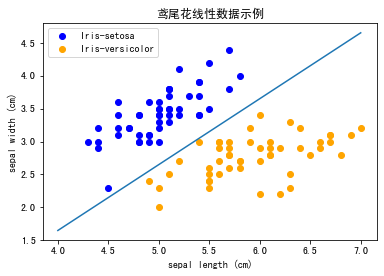

In [81]:
# 中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')
# 画点
plt.scatter(X[:50, 0], X[:50, 1], c='b', label='Iris-setosa',)
plt.scatter(X[50:100, 0], X[50:100, 1], c='orange', label='Iris-versicolor')
# 画感知机的线
x_ponits = np.arange(4, 8)
svm._weight()
y_ = -(svm.w[0]*x_ponits + svm.b)/svm.w[1]
plt.plot(x_ponits, y_)
# 画图例等
plt.legend()  # 显示图例
plt.grid(False)  # 不显示网格
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

#超平面
print("w: {} b: {}".format(svm.w.round(2), svm.b.round(2)))
# svm.w = [ 70.7, -87.9]
# svm.b = [-117.]

## scikit-learn实例

In [64]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import  train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
%matplotlib inline
iris = load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [65]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.8333333333333334


/Users/rchen/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


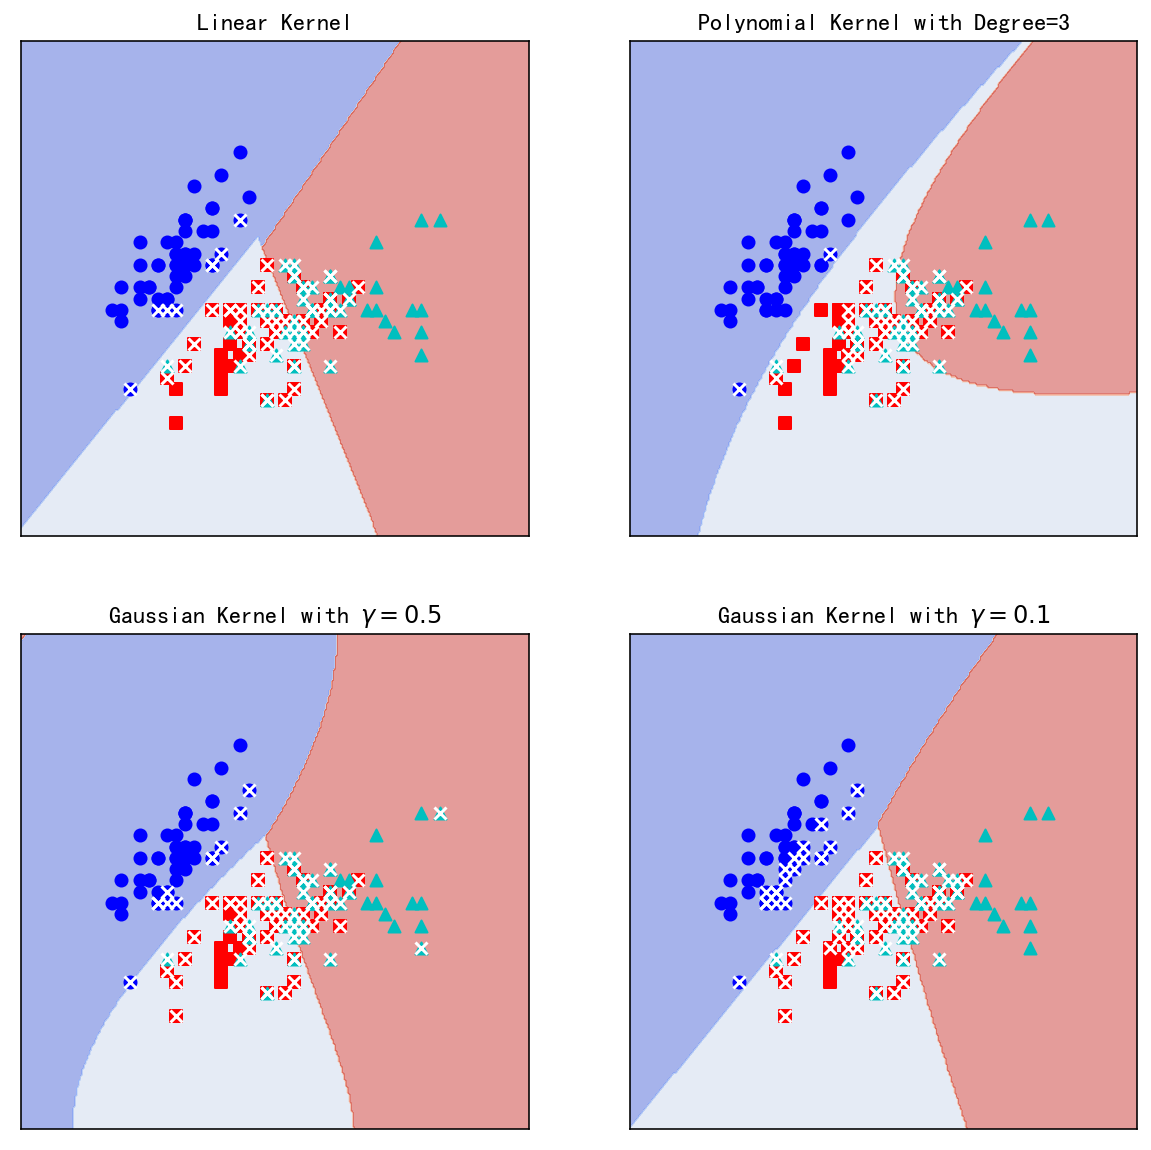

In [66]:
plt.figure(figsize=(10, 10), dpi=144)

clf_linear = svm.SVC(C=1.0, kernel='linear')
clf_poly = svm.SVC(C=1.0, kernel='poly', degree=3)
clf_rbf = svm.SVC(C=1.0, kernel='rbf', gamma=0.5)
clf_rbf2 = svm.SVC(C=1.0, kernel='rbf', gamma=0.1)
clfs = [clf_linear, clf_poly, clf_rbf, clf_rbf2]
titles = ['Linear Kernel', 
          'Polynomial Kernel with Degree=3', 
          'Gaussian Kernel with $\gamma=0.5$', 
          'Gaussian Kernel with $\gamma=0.1$']
for clf, i in zip(clfs, range(len(clfs))):
    clf.fit(X, y)
    plt.subplot(2, 2, i+1)
    plot_hyperplane(clf, X, y, title=titles[i])


### sklearn.svm.SVC

*(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None,random_state=None)*

参数：

- C：C-SVC的惩罚参数C?默认值是1.0

C越大，相当于惩罚松弛变量，希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样对训练集测试时准确率很高，但泛化能力弱。C值小，对误分类的惩罚减小，允许容错，将他们当成噪声点，泛化能力较强。

- kernel ：核函数，默认是rbf，可以是‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ 
    
    – 线性：u'v
    
    – 多项式：(gamma*u'*v + coef0)^degree

    – RBF函数：exp(-gamma|u-v|^2)

    – sigmoid：tanh(gamma*u'*v + coef0)


- degree ：多项式poly函数的维度，默认是3，选择其他核函数时会被忽略。


- gamma ： ‘rbf’,‘poly’ 和‘sigmoid’的核函数参数。默认是’auto’，则会选择1/n_features


- coef0 ：核函数的常数项。对于‘poly’和 ‘sigmoid’有用。


- probability ：是否采用概率估计？.默认为False


- shrinking ：是否采用shrinking heuristic方法，默认为true


- tol ：停止训练的误差值大小，默认为1e-3


- cache_size ：核函数cache缓存大小，默认为200


- class_weight ：类别的权重，字典形式传递。设置第几类的参数C为weight*C(C-SVC中的C)


- verbose ：允许冗余输出？


- max_iter ：最大迭代次数。-1为无限制。


- decision_function_shape ：‘ovo’, ‘ovr’ or None, default=None3


- random_state ：数据洗牌时的种子值，int值


主要调节的参数有：C、kernel、degree、gamma、coef0。

-----
参考资料：

[1] :[Lagrange Multiplier and KKT](http://blog.csdn.net/xianlingmao/article/details/7919597)

[2] :[推导SVM](https://my.oschina.net/dfsj66011/blog/517766)

[3] :[机器学习算法实践-支持向量机(SVM)算法原理](http://pytlab.org/2017/08/15/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E7%AE%97%E6%B3%95%E5%AE%9E%E8%B7%B5-%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%9C%BA-SVM-%E7%AE%97%E6%B3%95%E5%8E%9F%E7%90%86/)

[4] :[Python实现SVM](http://blog.csdn.net/wds2006sdo/article/details/53156589)

----
参考代码：https://github.com/wzyonggege/statistical-learning-method

中文注释制作：机器学习初学者

微信公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](images/gongzhong.jpg)